# Logistic Regression
## Categorical variables and the problem with linear regression



Until now, we have only considered continous variables, these are variables which can take potentially all *real* values.

On the other hand, categorical variables are those which take only *discrete* values, this might be certain classes in a dataset, in practice we represent these with a 1 or a 0. For example, a tumor might be malignant (1) or benign (0). So now our regression model is tasked with predicting binary variables as opposed to real variables.

This can introduce problems in linear regression algorithms, since these values can extend beyond 1, and below 0, where it is only necessary that the model function between 1 and zero. 

You might think we can use linear regression anyway, and apply a thresholding function, that is when the value predicted by the linear regression model is <0.5 predict 0, and >0.5 predict 1, and this can sometimes work, for example in the image below, taken from [this stack overflow page](https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression):

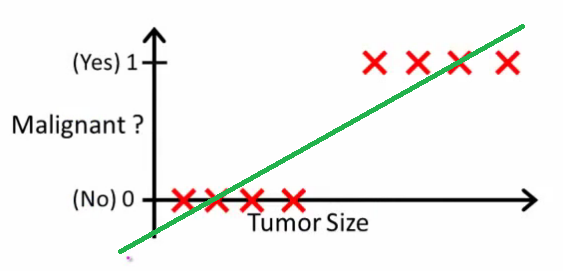

The regression algorithm is predicting outside of the class range, below 0 and above 1, so there is reduncancy in the model, but it does still work. 

Now, what if there is outlying data, such as a really large tumor? As shown below this regression solution can quickly become incorrect, and unsafe:

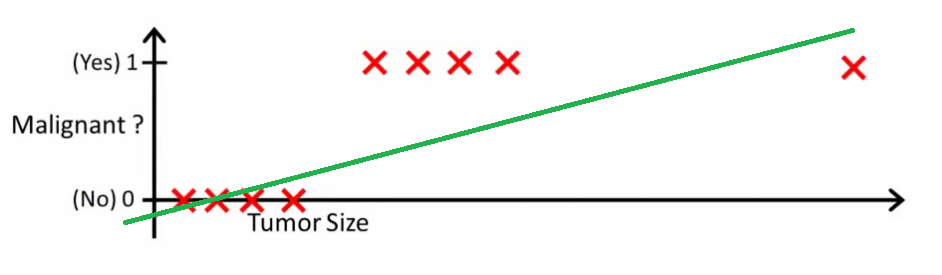

## Logistic regression and probabilities

To solve this problem, we want to squeeze the output of our linear model between 0 and 1, and we can do this using the logistic function, otherwise known as a sigmoid:

$\text{logistic}(z) = \frac{1}{1+e^{-z}}$

Which takes the following form:

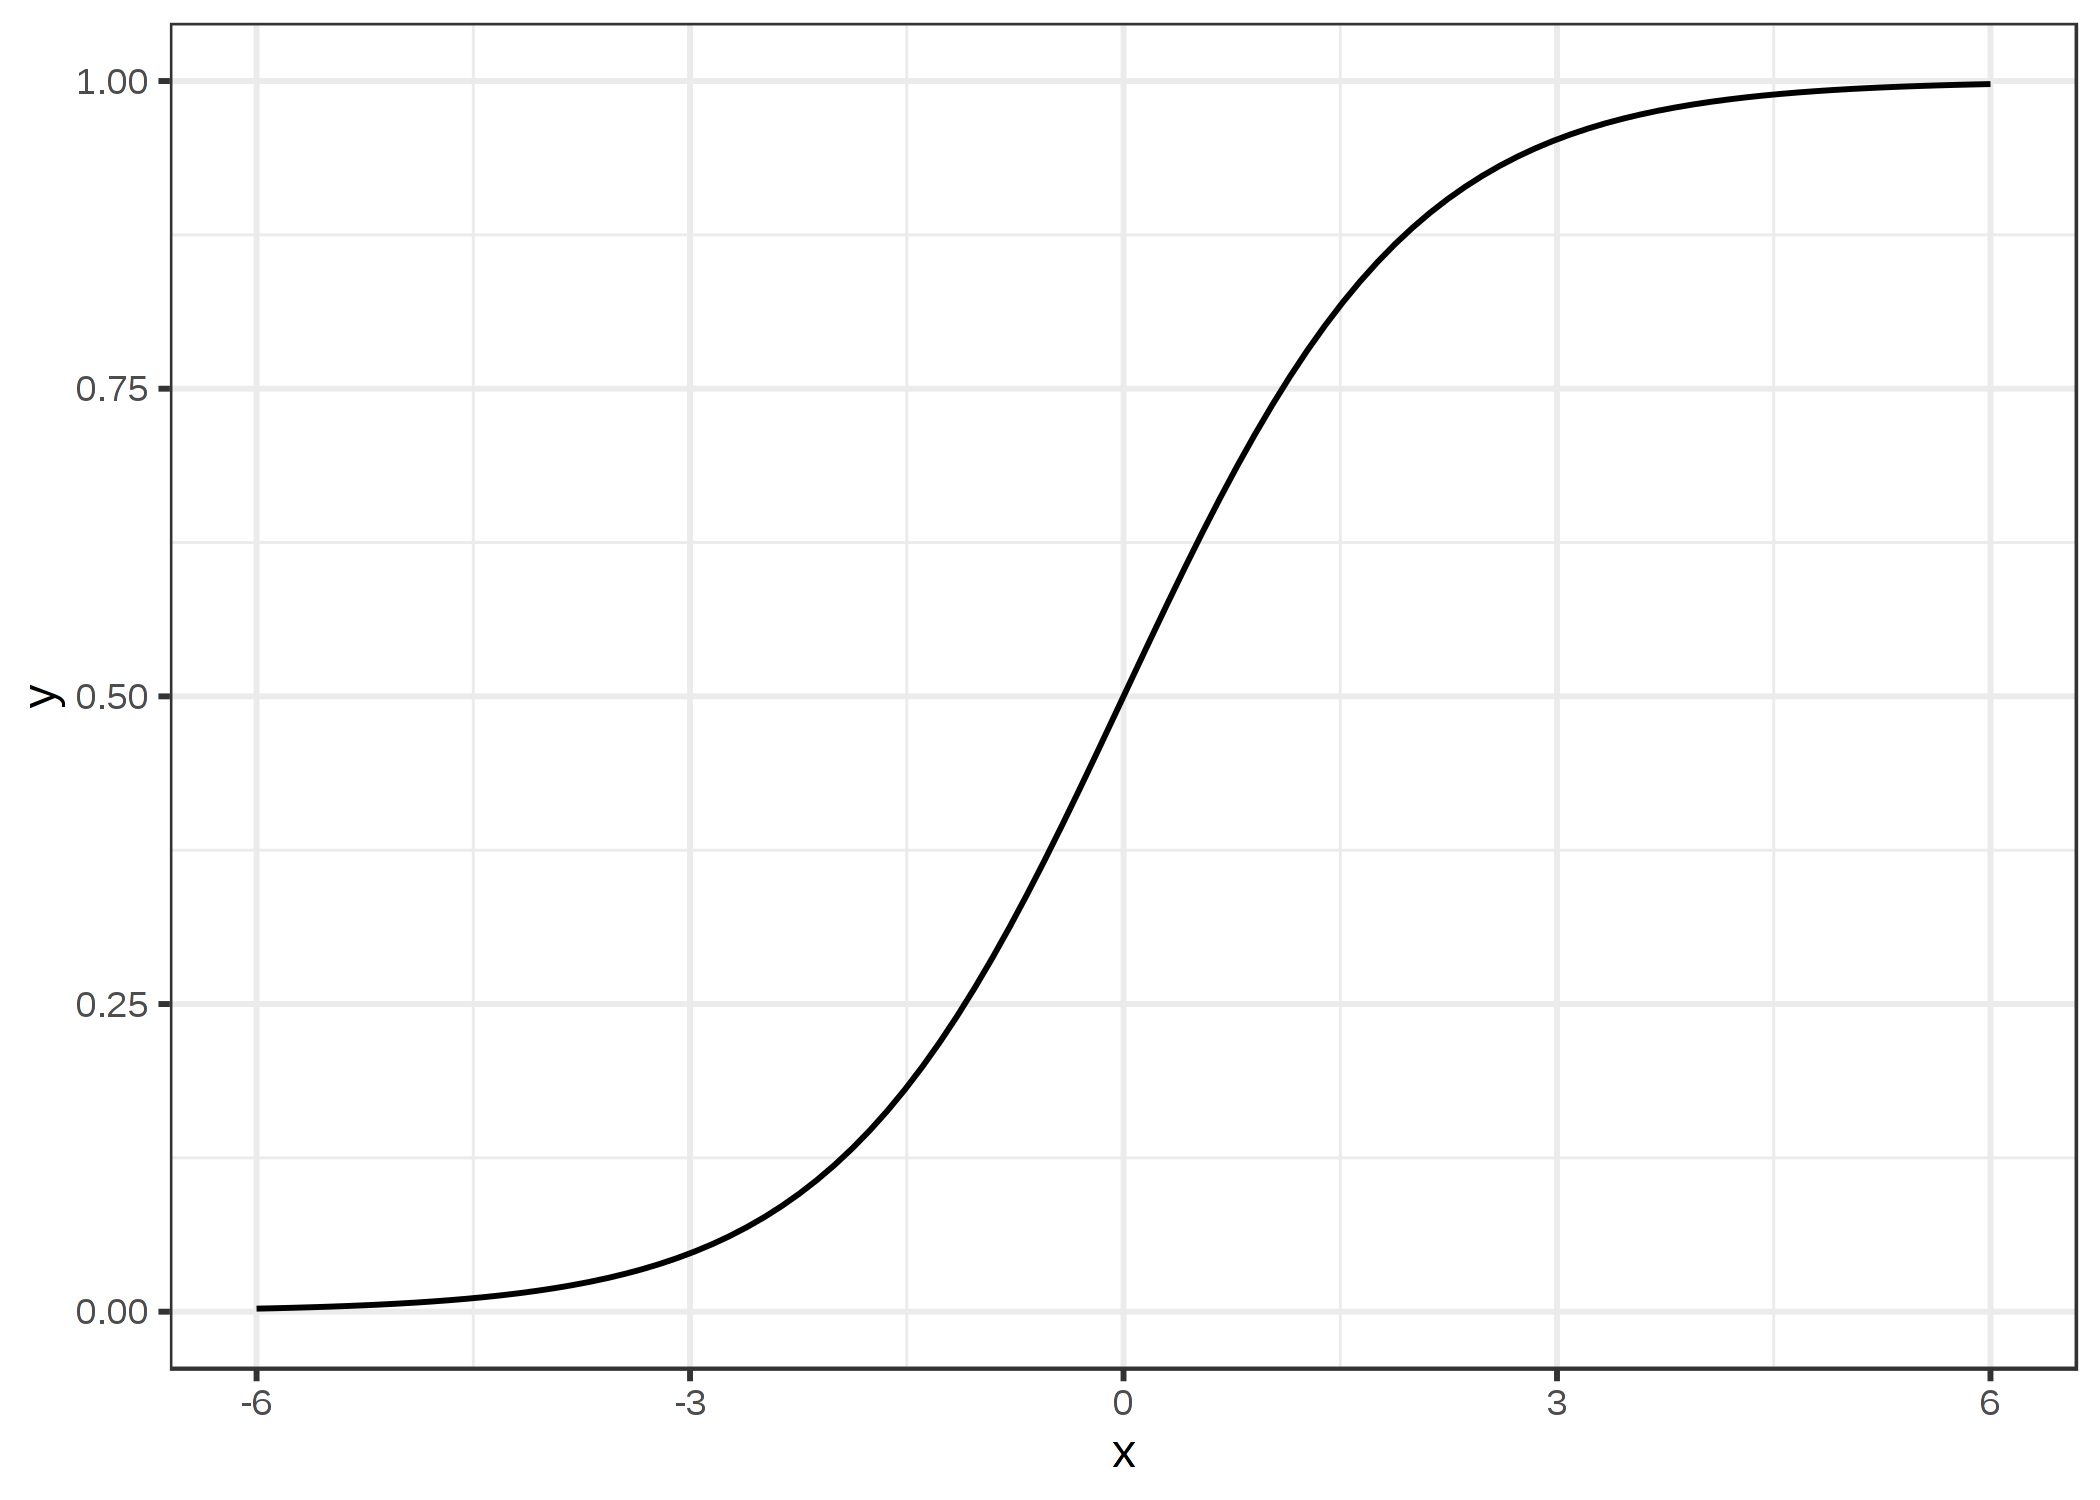

Now the output of our model will be forced into this shape, lets see how that effects our model: 

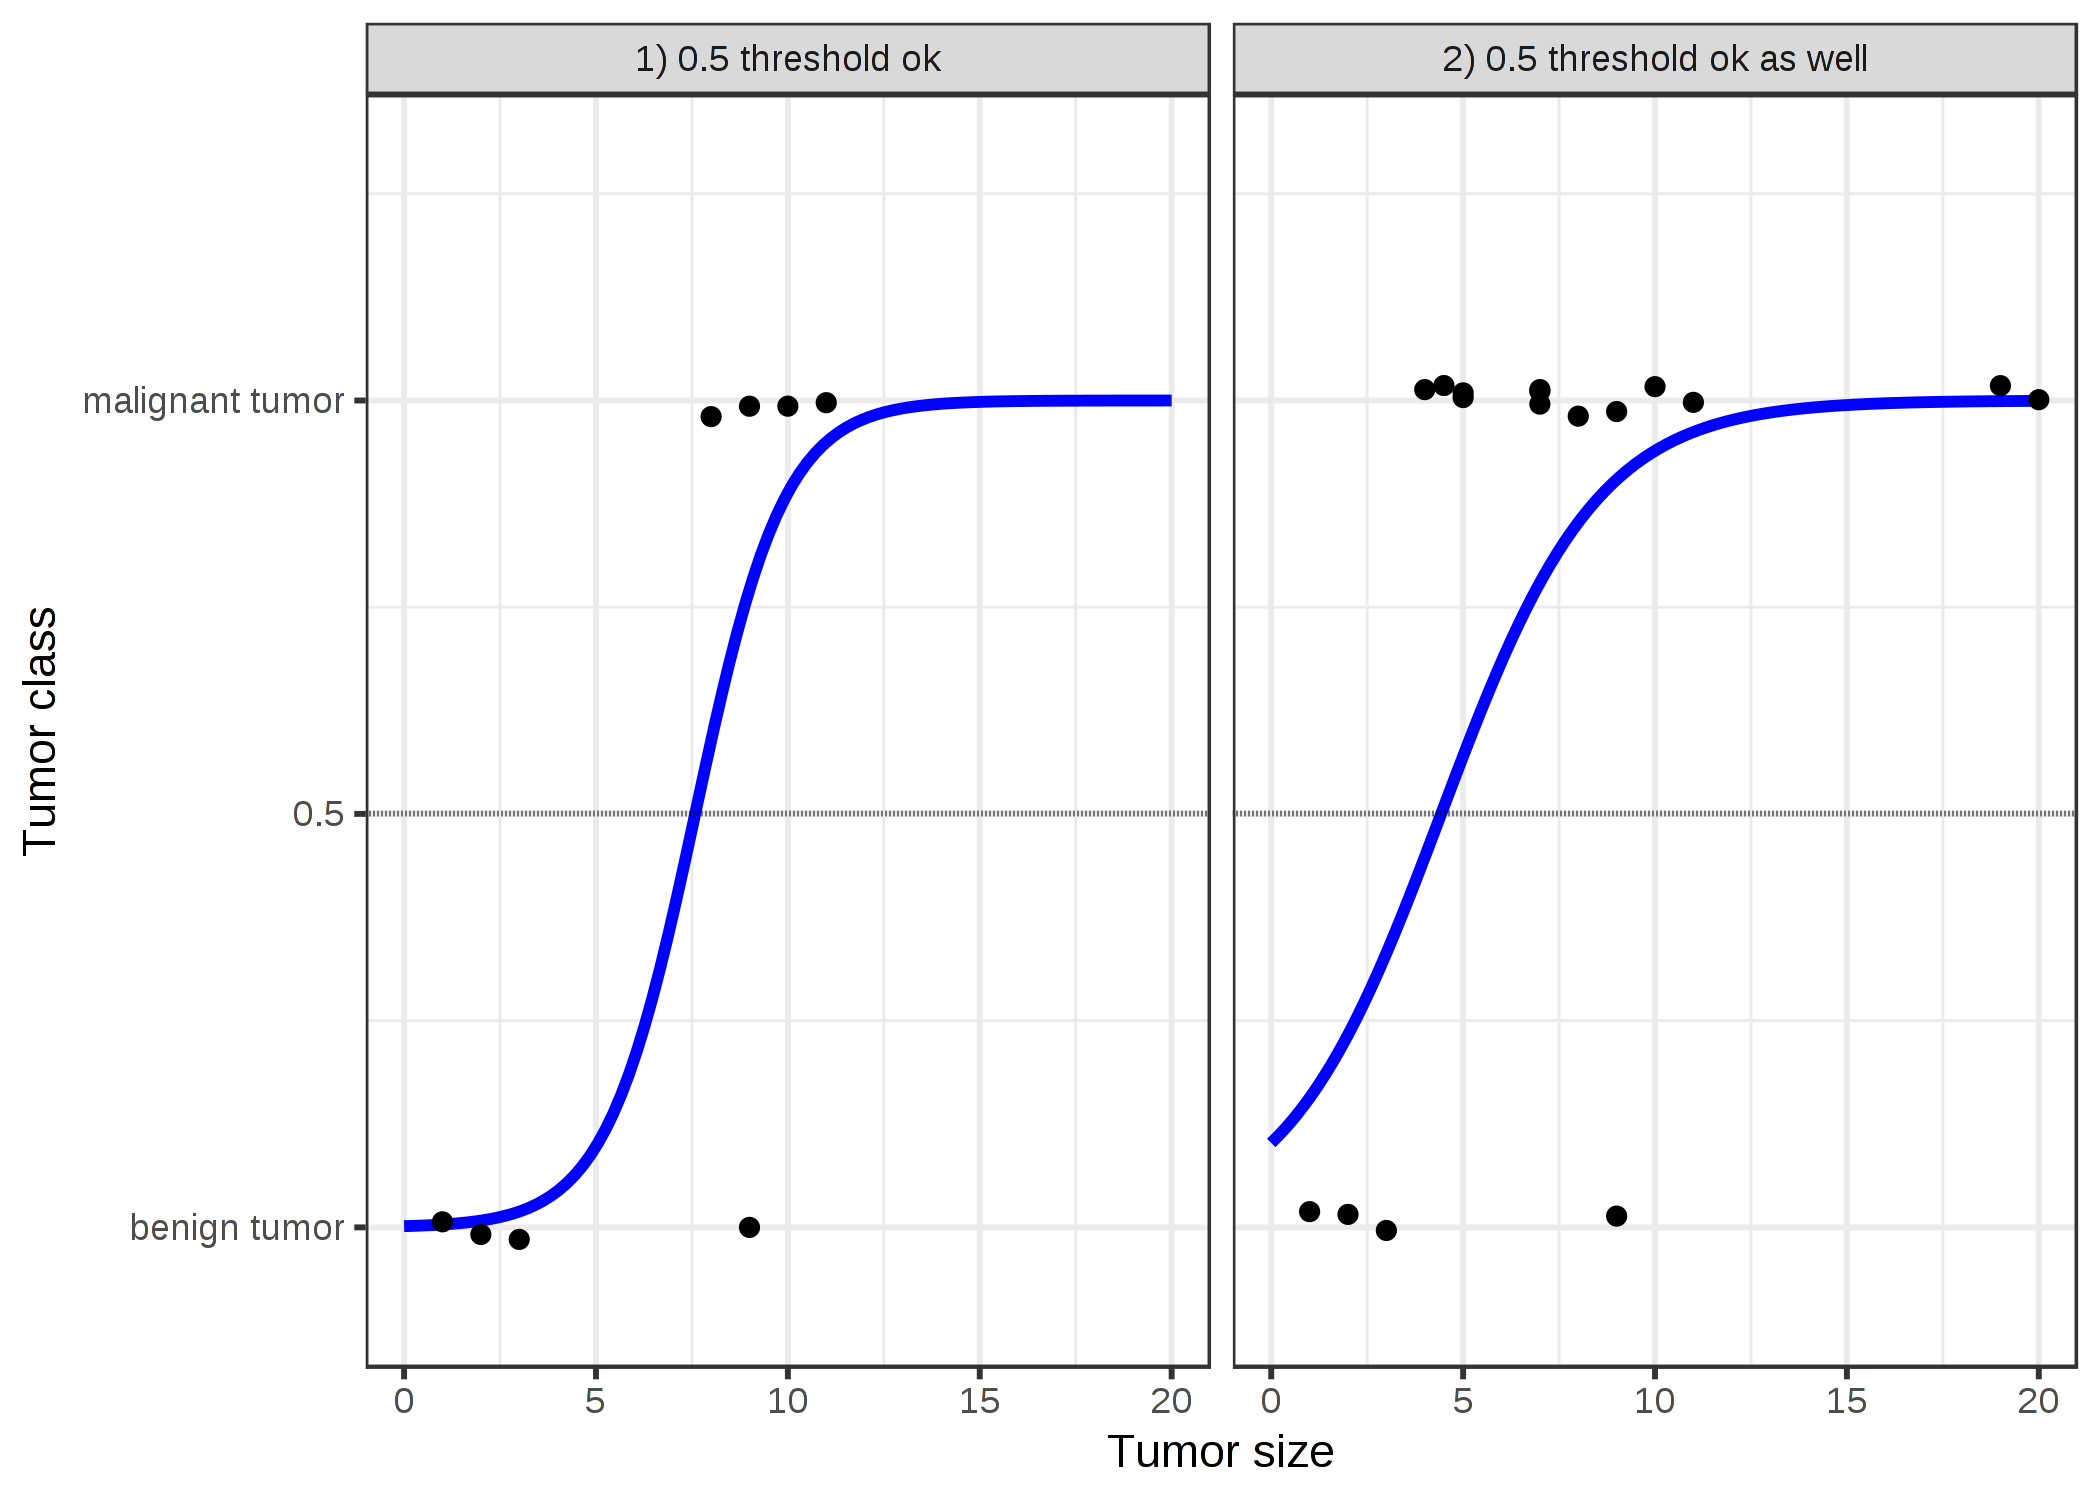

As you can see, this logistic transforms the regression model, to be less influenced by outliying data. Furthermore, it only predicts in the range of the data, between 0 and 1. 

This leads us to another interesting result of using a logistic function on our linear model, is it now outputs a tangible probability of which class a given data point belongs to. Since the output is restricted between 0 and 1, in our example the output will be the probability of the tumour being malignant, and 1 minus the probability of it being benign.

From this, we can define the *odds* an event will occur, that is the probability, $P$, of an event occuring, divided by the probability that it will not occur:

$\text{odds} = \frac{P}{1-P}$

Since our model is a linear model passed through the logistic/sigmoid function, our model takes the following form: 

$$\hat y = \frac{1}{1+e^{-(x_1\cdot w_1 + x_2\cdot w_2 + b)}}$$

$$\hat y = \frac{1}{1+e^{-z}}$$ where $z = x_1\cdot w_1 + x_2\cdot w_2 + b$ 

This is equivalent to a probability: 

$$P(\text{malignant}) = \frac{1}{1+e^{-(x_1\cdot w_1 + x_2\cdot w_2 + b)}}$$

Then we can find a reltionship between the odds, and the actual parameters of the model, given our model is a probability. We do this by taking the natural log of the odds: 

$$\ln(\text{odds}) = \ln\Big(\frac{P}{1-P}\Big)$$

$$\ln\Big(\frac{P}{1-P}\Big) = \ln \Bigg(\frac{\frac{1}{1+e^{-z}}}{1-\frac{1}{1+e^{-z}}}\Bigg)$$

We can use some familiar log laws here to simplify this expression: 

$$\ln\Bigg(\frac{\frac{1}{1+e^{-z}}}{1-\frac{1}{1+e^{-z}}}\Bigg) = \ln\Big(\frac{1}{1+e^{-z}}\Big) - \ln\Big( 1 - \frac{1}{1+e^{-z}} \Big)$$

$$= \ln(1) - \ln(1 + e^{-z}) - \ln\Big( \frac{1+e^{-z} -1}{1 + e^{-z}} \Big)$$

$$= 0 - \ln(1 + e^{-z}) - \big(\ln(1+e^{-z} -1) -\ln(1 + e^{-z})\big)$$

$$= - \ln(1 + e^{-z}) - \ln(1+e^{-z} -1) +\ln(1 + e^{-z})$$

$$= - \ln(1+e^{-z} -1) $$

$$= - \ln(e^{-z}) = z $$

Hence: 

$$\ln\Big(\frac{P}{1-P}\Big) = z = x_1\cdot w_1 + x_2\cdot w_2 + b$$

So we can see a direct correlation between the probability of a given class and the parameters of the model. Now we'll use some of what we've learnt to create our own logistic regression model.

# Making our own logistic regression model.

Now we have a brief understanding of the motivation behind logistic regression models, we can code our own

In [ ]:
#importing python packages to make things easier

import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
import numpy as np

# Generating data

First we need to generate some data on which to use our model, we will add a second dependant variable now, and rather than plotting the class on an axis, we will represent it using different coloured data points. 

Fortunately this python package has some useful functions for just this purpose:

In [ ]:
#generating some data data

#X contains our datapoints/features, y contains our labels (0 and 1)

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state = 1, n_clusters_per_class=1)

#plotting data

plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])

plt.show()


# Creating our functions
##The sigmoid

First we'll start with the sigmoid function, the most important part of the logistic regression model. Which as we've seen takes the following form:

$\sigma(z) = \frac{1}{1-e^{-z}}$

Below write a function which takes the model output, and passes it through the sigmoid function:

These hints may help you:

np.exp(x) = $e^x$

In [ ]:
#sigmoid

#create a function which outputs the sigmoid of z

def sigmoid(z):

    #YOUR CODE HERE - Most has been written for you, you just need to write a line which calculates sigma given a z value

    return sigma 

#The cross-entropy loss function
As discussed earlier, machine learning models need to use a *loss function* in order for them learn. The purpose of the loss function is for the model to understand which data points it is performing well on, and which it isn't.

We use the derivative of this loss function with respect to the model paramters to understand how the paramaeters should be changed when the model is being optimised. 

For classifcation one of the most common *losses* is the cross entropy loss: 

$L(\hat y,y) = - y \log(\hat y) + (1- y)\log(1-\hat y) $

Which in practice we sum over all training inputs:

$$L(\hat y,y) = -\frac{1}{m}\sum_{i=0}^{‎m}[y_i \log(\hat y_i) + (1- y_i)\log(1-\hat y_i)] $$

Here $y$ is the true value, and $\hat y$ is the output of the model, with the sigmoid applied to it: $\hat y = \sigma(z)$

Since $y$ can take one of two values in this problem, 1 or 0. The loss will only ever use one term in this loss function, the first or the second: If the true value is 0 then only the second term of the loss is used: $(1-y)\log(1-\hat y)$.

Likewise if the true value of $y$ is 1 then only the first term is used: $y\log(\hat y)$. 

As each of the $\log$ terms approach 0 the loss will approach infinity, and when they approach 1 the loss will tend to 0. This gives the loss the following form as its inputs change:

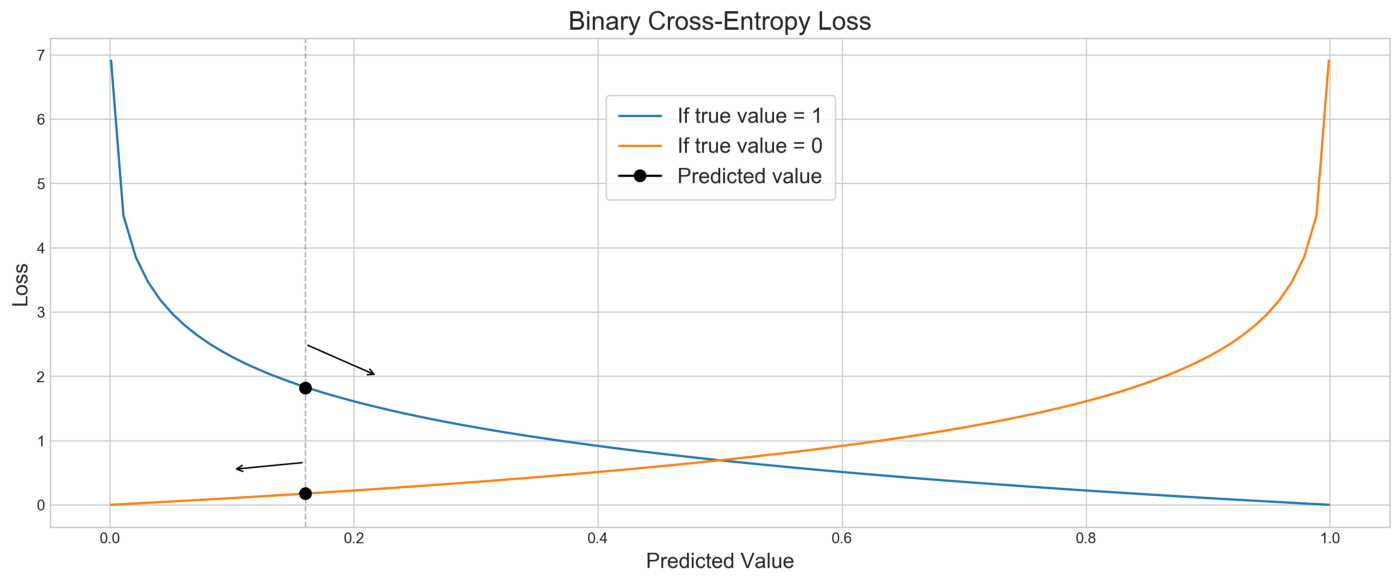

Below complete this function for a loss, it takes a batch of inputs and calculates the loss over all of them using the equation above. It then returns the loss, everything else is written for you, just make sure the loss is calculated like in the equation above. These hints might help you.

y_hat = $\hat y$

np.log(x) = $\log(x)$

np.mean(x) = $\frac{\sum_{i=0}^{‎m}x_i}{m}$ 

In [ ]:
#loss

def loss(y, y_hat):
    #y = vector of outputs
    #y_hat vector of true outputs

    #Use the equation above write our total loss function across all inputs (Hint np.mean is equivalent to summing and dividing by the number of samples)
    #YOUR CODE HERE

    return loss

# Getting the derivative

As mentioned earlier, the loss is only the first half of the problem, we also need to differentiate this function with respect to the model parameters, in order to get the *gradients* of the loss. 

This process is non-trivial, but at its heart it is just an application of the chain rule:

We'll start with the loss function, we can drop the summation and add it back later, so we get: 

$L(\hat y,y) = -y\log(\hat y) + (1-y)\log(1-\hat y)$

Since there are two components to our model producing the output $\hat y$:

($\hat y = \sigma(z)$ and $z = w\cdot x + b$), 

we wish to find the derivative with resepct to both of them. That is:

$\frac{dL}{dw}$ and $\frac{dL}{db}$, in order to get to these, we must first differentiate the loss with respect to $\hat y$, as we can use the chain rule to get to the derivatives we need. 

$\frac{dL}{dw} = \frac{dL}{d\hat y}\frac{d\hat y}{dz}\frac{dz}{dw}$

$\frac{dL}{db} = \frac{dL}{d\hat y}\frac{d\hat y}{dz}\frac{dz}{db}$

So there are 3 components to each derivative, and 4 in total for us to find: 

$\frac{dL}{d\hat y}$, $\frac{d\hat y}{dz}$, $\frac{dz}{dw}$, and $\frac{dz}{db}$



We'll start with $\frac{dL}{d\hat y}$, treating $y$ as a constant.

$L(\hat y,y) = -y\log(\hat y) + (1-y)\log(1-\hat y)$

$\frac{dL(\hat y)}{d\hat y} = \frac{d(-y\log(\hat y))}{d\hat y} + \frac{d((1-y)\log(1-\hat y))}{d\hat y}$

Which using the log law: $\frac{d(n \log(x))}{dx} = \frac{n}{x}$

$\frac{dL(\hat y)}{d\hat y} = \frac{-y}{\hat y} + \frac{1-y}{1-\hat y}$

Which taking common denominators and simplifying gives us:

$$\frac{dL(\hat y)}{d\hat y} = \frac{y-\hat y}{\hat y(1-\hat y)}$$

Now we'll consider $\frac{d\hat y}{dz}$.

We know that: $\hat y = \frac{1}{1 + e^{-z}}$

This derivative of a sigmoid is a common one in machine learning, and has an involved derivation which can be found [here](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e).

This article shows the outcome can take the following form:

$$\frac{d\hat y}{dz} = \hat y (1-\hat y)$$


Finally we have $\frac{dz}{dw}$ and $\frac{dz}{db}$:

$z$ takes the form: 

$z = w\cdot x + b$

Making this an easy couple of derivatives:

$$\frac{dz}{dw} = x$$

and 

$$\frac{dz}{db} = 1$$

So we now have 

$\frac{dL}{dw} = \frac{dL}{d\hat y}\frac{d\hat y}{dz}\frac{dz}{dw} = \frac{y-\hat y}{\hat y(1-\hat y)}\hat y (1 - \hat y) x $

$\frac{dL}{dw} = x (y - \hat y)$

And:

$\frac{dL}{db} = \frac{dL}{d\hat y}\frac{d\hat y}{dz}\frac{dz}{db} = \frac{y-\hat y}{\hat y(1-\hat y)} \hat y (1 - \hat y) (1)$

$\frac{dL}{db} = y - \hat y$



Finally, reintroducing the summation terms: 

$$\frac{dL}{dw} = \frac{1}{m} \sum_{i=1}^m x_i(y_i - \hat y_i)$$

Which can be vectorised to: 

$$\frac{1}{m}(\mathbf{x}\cdot(\mathbf{y - \hat y}))$$

And the derivative with respect to the bias is simply the sum of the difference in output and target label:

$$\frac{dL}{dw} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat y_i)$$

Below, complete the function which calculates the two gradients we need: 

Some hints:

np.dot(x,y) = $\mathbf x \cdot \mathbf y$

In [ ]:
#getting the gradients from the loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights: dw 
    # Hint: Our feature vector, X, will need to be transposed in the dot product. So use X.T instead of X
    #YOUR CODE HERE

    
    # Gradient of loss w.r.t bias: db
    #YOUR CODE HERE

    
    
    return dw, db

# Plugging this altogether

Now we'll take all of the functions we've made and use them to learn our decision boundary and plot it. 

This is all written for you, but follow the code and understand how it works, particularly the train function. 

In [ ]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating predictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
#plotting the decision boundary of our classifier

def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([min(X[:,0])-0.25, max(X[:,0])+0.25])
    plt.ylim([min(X[:,1])-0.25, max(X[:,1])+0.25])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [ ]:
#normalising our inputs

def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X


In [ ]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [ ]:
#get accuracy of classifier

def accuracy(y, y_hat):
    #Here we just sum the number of predictions that are correct, and divide by the total number of predictions
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

accuracy(y, y_hat=predict(X))

In [ ]:
# Here we can make a distribution which cannot be separated with a linear boundary, and we can observe how good of a solution our algorithm generates
X, y = make_moons(n_samples=100, noise=0.24)

In [ ]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

accuracy(y, y_hat=predict(X))